### Random walks

One of the most common **random process** one can think about is the **random walk**. There are so many different types dependning on the lattice and the possible steps. The most elementary is the one in which the random walker starts at 0 and at each step moves only +1 or -1, with equal probability. 

Here, we're going to look at the **2-D random walk**, in a **square lattice**. Thus, the possible steps are North (**N**), South (**S**), East (**E**) and West (**W**), with equal probability. 

In [1]:
import math
from random import random, randint
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [2]:
@jit
def random_walk(steps):
    
    #Possible directions
    directions = ['North', 'East', 'South', 'West'] 
    
    #Array of the positions
    x_pos = np.zeros(steps)
    y_pos = np.zeros(steps)
    
    for i in range(1, steps):
    
        #Choosing a direction randomly
        r = random()

        if r <= 0.25:
            x_pos[i]= x_pos[i-1]
            y_pos[i] = y_pos[i-1] + 1

        elif r<= 0.5:
            x_pos[i]= x_pos[i-1] + 1
            y_pos[i] = y_pos[i-1]

        elif r<=0.75:
            x_pos[i]= x_pos[i-1]
            y_pos[i] = y_pos[i-1] - 1

        else:
            x_pos[i]= x_pos[i-1] - 1
            y_pos[i] = y_pos[i-1]
        
    return x_pos, y_pos

In [3]:
steps = 1000

x, y = random_walk(steps)

#Finding the max values (for plotting)
if np.abs(x).max() > np.abs(y).max():
    lim = 1.1*np.abs(x).max()

else:
    lim = 1.1*np.abs(y).max()


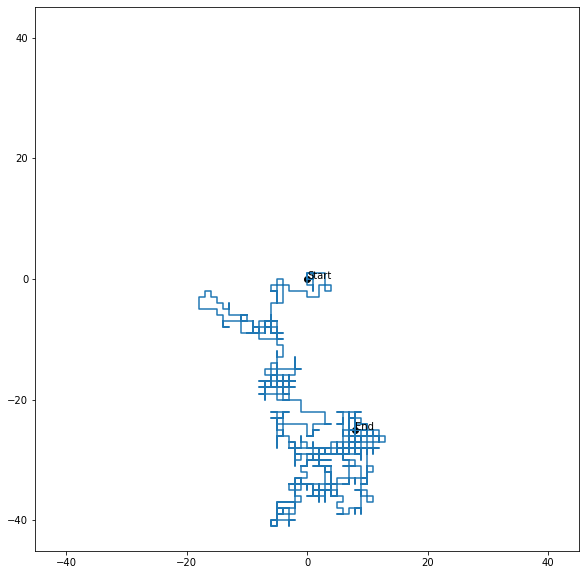

In [4]:
#Plottig the random walk

plt.figure(figsize=(10,10))
plt.axis('square')

plt.plot(0,0, 'ko')
plt.text(0,0, 'Start')

plt.plot(x[steps-1],y[steps-1], 'ko')
plt.text(x[steps-1],y[steps-1], 'End')


plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

plt.plot(x, y)

Now, we're going to see how change the average of the displacement with the number of steps. So, we'll take the average displacement of 500 simulations, and we'll repeat this for several number of steps.

In [5]:
@jit
def average_displacement(simulations, iterations):
    
    displacement = np.zeros(iterations)
    avg_displ = np.zeros(simulations)
    steps = np.zeros(iterations)
    
    steps[0] = 5
    
    
    for k in range(iterations):
        
        for j in range(simulations):
            
            x, y = random_walk(int(steps[k]))
            
            avg_displ[j] = math.sqrt(x[int(steps[k])-1]**2 + y[int(steps[k])-1]**2)
            
        displacement[k] = avg_displ.mean()
        steps[k+1] = 2*steps[k]
        
    
    return steps, displacement
    

In [6]:
#Number of simulations
N = 500

#Number of iterations
iterations = 20

steps, displacement = average_displacement(N, iterations)

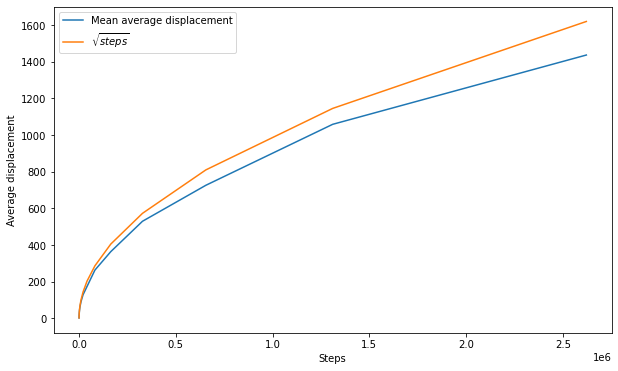

In [7]:
plt.figure(figsize=(10,6))

plt.xlabel('Steps')
plt.ylabel('Average displacement')

plt.plot(steps, displacement, label = 'Mean average displacement')
plt.plot(steps, np.sqrt(steps), label = r'$\sqrt{steps}$')

plt.legend()

We conclude that the growth of the mean average of the displacement is proportional to the square root of the number of steps. 

### Random walks and diffusion

**Diffusion** is the motion of particles from a region of **high concentration to** a region of **low concentration**. We say that the motion is poiting from the higher gradient regions to the lower ones. The motion "ends" when the systems reachs a state where there is no concentration gradient. 

We can study diffusion using the random walks seen previously. Let's imagine we have initially a certain number of particles confined in a small region of a square lattice. We'll suppose each particle moves like a random walker and that they are constrained to a 2L x 2L square lattice (L is the distance from the origin to one wall). So, a particle is bound to stay inside the region.

In [44]:
@jit
def diffusion(N, L, steps):
    
    '''
    N : to compute the total number of particles, N*N
    2L : the size of the square lattice
    '''
    
    x = np.zeros(0)
    y = np.zeros(0)

    # Initial configuration of particles (a NxN square)
    for i in range(N):
        for j in range(N):

            x = np.append(x, -int(N/2) + j)
            y = np.append(y, -int(N/2) + i)
            
    #Random walk
    for i in range(0, int(steps)):
    
        directions = ['North', 'East', 'South', 'West'] #Possible directions

        r = randint(0,int(N*N) - 1)  #Choosing a random particle
        
        #We have to consider the case in which one
        # particle is in one of the borders or corner
        # so that it cannot exit the square lattice
        if x[r] == L:
            directions.remove('East')

        elif x[r] == -L:
            directions.remove('West')

        if y[r] == L:
            directions.remove('North')

        elif y[r] == -L:
            directions.remove('South')

        #Choosing a direction randomly
        dir_i = randint(0, len(directions) - 1)
        direction = directions[dir_i]

        if direction == 'North':
            y[r] += 1

        elif direction == 'East':
            x[r] += 1

        elif direction == 'South':
            y[r] -= 1  

        else: 
            x[r] -= 1
        
    
    return x, y

In [47]:
#Initial conditions
N = 21 # N*N particles
L = 100
steps = [5000, 50000, 500000, 5000000]

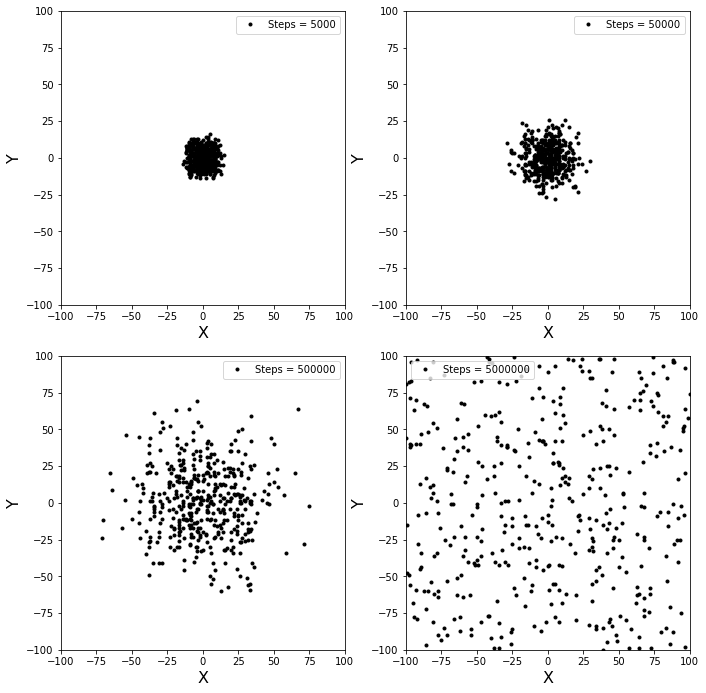

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10, 10))
axes = axes.flatten()
fig.tight_layout(pad=3.0)
i = 0

for ax in axes:
    
    x, y = diffusion(N, L, steps[i])
    
    ax.plot(x, y, label ='Steps = ' + str(steps[i]), linestyle = 'None', marker = 'o', markersize = 3, color='black')
    ax.set_xlabel('X', fontsize = 16)
    ax.set_ylabel('Y', fontsize=16)
    ax.legend()
    ax.set_xlim(-L, L)
    ax.set_ylim(-L, L)
    
    i += 1

plt.show()

As we would expect, for large times (steps) the distribution of particles along the lattice is completely homogeneous, that's to say there is no concentration gradient. Each particles moves individually, but the overall remains constant. 

Let's study this concept in a more physical way. We want to measure the amount of "**disorder**" on the system: the **entropy**. The statistical definition of entropy is

$$  S = - \sum_{i} P_i \ln{P_i}  \tag{1} $$

where the sum is over all posible states of the system and $P_i$ is the probability of finding the system in state $i$. In order to apply this definition we're going to divide our system into a square grid, as follows.

<img src="square_grid.png" align="centre" width="400"/>

Now, the sum of [1] is extended over every cell of this square grid and $P_i$ is the probability of finding the particle in the grid cell $i$. To compute the probability $P_i$ we count the number of particles inside the cell $i$ and we divide it by the total number of particles. 



In [49]:
@jit
def ProbabilityDistribution(x, y, num_squares, L):
    '''
    x, y : coordinates of the particles
    num_squares : number of squares per row/column 
    2*L : Size of the system
    
    '''
    density = np.zeros(num_squares**2)
    
    #Length of grid square
    a = 2*L / num_squares
    
    #Counting number of particles in each grid cell
    for k in range(len(x)):
        x_cell = np.floor(x[k] / a)
        y_cell = np.floor(y[k] / a)
        i = int (8 * y_cell + x_cell)
        density[i] += 1
    
    return density

In [50]:
@jit
def CalcEntropy(x, y, L):
    
    total_particles = len(x)
    S = 0
    
    #Number of squares per row/columns
    num_squares = 8
    
    densities = ProbabilityDistribution(x, y, num_squares, L)

    for density in densities:
        
        pi = density / total_particles
        
        if pi == 0:
            S -= 0 #Log function undefined at 0
            
        else:
            S -= pi * np.log(pi)

    return S

We need to modify the diffusion function in order to compute the entropy at several number of steps so we can see how evolves the entropy of the system with "time" (number of steps).

In [51]:
@jit
def new_diffusion(N, L, steps, S, h):
    
    '''
    N : to compute the total number of particles, N*N
    2L : the size of the system
    steps : the total number of steps
    S : an array to store the Entropy at differents nºsteps
    h : to calculate the Entropy at every h-steps
    '''
    
    x = np.zeros(0)
    y = np.zeros(0)
    
    j = 0

    # Initial configuration of particles (a NxN square)
    for i in range(N):
        for j in range(N):

            x = np.append(x, -int(N/2) + j)
            y = np.append(y, -int(N/2) + i)
                             
    
    for i in range(0, int(steps)):
        
        #Entropy
        if i % h == 0:
            
            S[j] = CalcEntropy(x, y, L)
            j += 1
            
        #Random walk
        directions = ['North', 'East', 'South', 'West'] #Possible directions

        r = randint(0,int(N*N) - 1)  #Choosing a random particle
        
        #We have to consider the case in which one
        # particle is in one of the borders or corner
        # so that it cannot exit the square lattice
        if x[r] == L:
            directions.remove('East')

        elif x[r] == -L:
            directions.remove('West')

        if y[r] == L:
            directions.remove('North')

        elif y[r] == -L:
            directions.remove('South')

        dir_i = randint(0, len(directions) - 1)

        #Choosing a direction randomly
        direction = directions[dir_i]

        if direction == 'North':
            y[r] += 1

        elif direction == 'East':
            x[r] += 1

        elif direction == 'South':
            y[r] -= 1  

        else: 
            x[r] -= 1
        
    
    return x, y, S

In [84]:
#Initial conditions

steps = 6000000
h = 1000
s = np.zeros(int(steps/h)) #Entropy array
L = 100
N = 21


In [85]:
x, y, entropy = diffusion_1(N, L, steps, s, h)
steps_i = np.arange(0, steps, h)

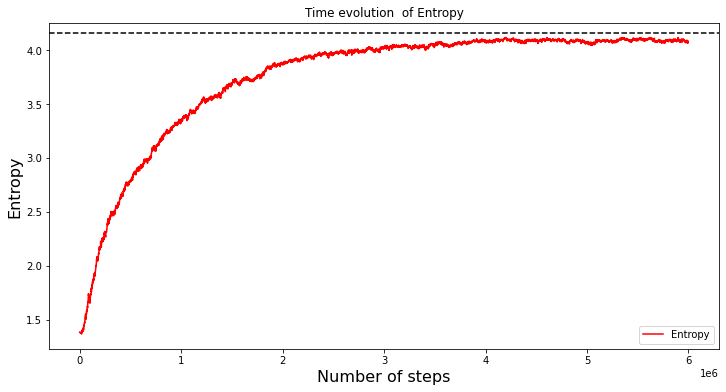

In [86]:
fig, ax = plt.subplots(1, figsize = (12, 6))
ax.set_title('Time evolution  of Entropy')
    
ax.plot(steps_i, entropy, 'r',  label ='Entropy')
ax.set_xlabel('Number of steps', fontsize = 16)
ax.set_ylabel('Entropy', fontsize=16)
ax.axhline(y = 4.159, color = 'black', linestyle  = '--')
ax.legend()

From this plot we see clearly that the initial ordered system, small entropy, tends to a state of maximal entropy when we let it evolve, until it reaches a steady state (approx). There's an upper bound of the entropy. In fact, when the system is completely disordered (homogeneous), every grid cell has the same probability, which is one divided by the number of cells. Thus, working out [1] we get that the maximum entropy is $ S =  \ln (64) \approx 4.159 $, where 64 is the total number of cells used in the calculations. The fact that the entropy depends on the number of cells chosen is not relevant, since we only are interested in the differences of entropy. 